In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table
from astropy.stats import sigma_clip
def my_plot_style():
    params = {'legend.fontsize': 15,
    'axes.labelsize': 15,
    'axes.titlesize':15,
    'xtick.labelsize':15,
    'ytick.labelsize':15,
    'xtick.major.size':5,
    'xtick.minor.size':2.5,
    'ytick.major.size':5,
    'ytick.minor.size':2.5,
    'figure.facecolor':'w',
    #'lines.linewidth' : 1.5,
    'xtick.major.width':1.5,
    'ytick.major.width':1.5,
    'xtick.minor.width':1.5,
    'ytick.minor.width':1.5,
    'axes.linewidth':1.5,
    'xtick.direction':'in',
    'ytick.direction':'in',
    'ytick.labelleft':True,
    'text.usetex' : False,
    'font.family': 'sans-serif'}
    plt.rcParams.update(params)
my_plot_style()

### Part 1: Building your own mini distance ladder
#### 1. Define useful functions

In [2]:
def distance(cluster):
    return np.median(1/(abs(cluster['parallax'])*0.001))
def absolute_mag(cluster,n_parallax='parallax',n_mag='phot_g_mean_mag',dist=-1):
    if( dist<0 ): dist = np.median(1/(abs(cluster[n_parallax])*0.001))
#     print(f'Distance of the cluster: {dist:.1f} pc')
#     print(f'Distance modulus: {5*np.log10(dist)-5}')
    M_g = cluster[n_mag]-5*np.log10(dist)+5
    return M_g

#### 2. For the nearby cluster, I choose [Praesepe](http://simbad.u-strasbg.fr/simbad/sim-id?Ident=Praesepe&NbIdent=1&Radius=2&Radius.unit=arcmin&submit=submit+id). 
I first require the sample show have proper motion in RA/Dec, and positive parallax.

In [3]:
cluster = Table.read('./ngc2632-result.fits')
cluster = cluster[~np.isnan(cluster['pmra'])&(~np.isnan(cluster['pmdec']))&(cluster['parallax']>0)]

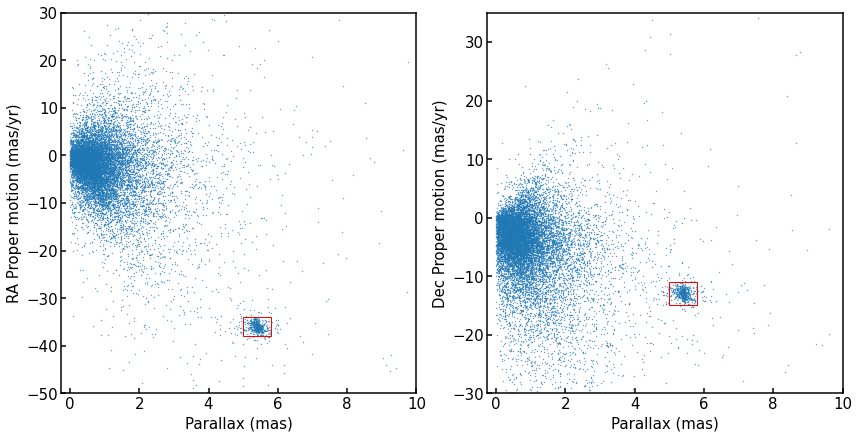

In [4]:
# NGC2632
rec_x_arr = [[5,5.8],[5,5.8]]
rec_y_arr = [[-38,-34],[-15,-11]]
plot_y_arr = [[-50,30],[-30,35]]
plot_x_arr = [[-0.25,10],[-0.25,10]]
yaxis    = ['pmra','pmdec']
yname    = ['RA Proper motion (mas/yr)','Dec Proper motion (mas/yr)']

fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,7))
bool_arr = []
for i in range(2):
    ax = axes[i]
    x, y = 'parallax', yaxis[i]
    xlim, ylim = rec_x_arr[i], rec_y_arr[i]
    ax.scatter(cluster[x],cluster[y],s=0.1)
    rec = plt.Rectangle([xlim[0],ylim[0]],xlim[1]-xlim[0],ylim[1]-ylim[0],fill=False,color='red')
    ax.add_patch(rec)
    ax.set_xlabel('Parallax (mas)')
    ax.set_ylabel(yname[i])
    ax.set_xlim(plot_x_arr[i])
    ax.set_ylim(plot_y_arr[i])
    boolean = (cluster[x]>xlim[0])&(cluster[x]<xlim[1])&(cluster[y]>ylim[0])&(cluster[y]<ylim[1])
    bool_arr.append(boolean)
sample = cluster[bool_arr[0]&bool_arr[1]]
close = sample
plt.show()

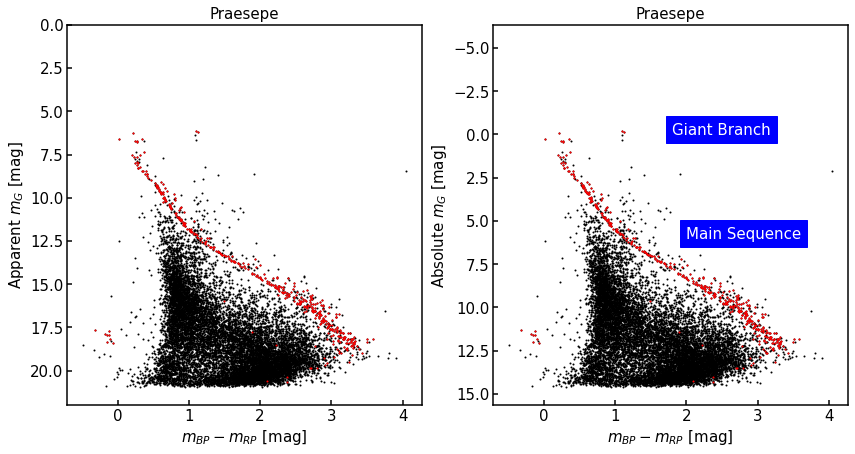

In [5]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(14,7))
ax0, ax1 = ax[0],ax[1]

ax0.scatter(cluster['bp_rp'],cluster['phot_g_mean_mag'],s=1,alpha=1,c='black')
ax0.scatter(sample['bp_rp'],sample['phot_g_mean_mag'],s=1,alpha=1,c='red')
ax0.set_ylim([22,0])
ax0.set_xlabel(r'$m_{BP} - m_{RP}\ [{\rm mag}]$')
ax0.set_ylabel(r'Apparent $m_{G}\ [{\rm mag}]$')

ax1.scatter(cluster['bp_rp'],absolute_mag(cluster,dist=distance(sample)),s=1,alpha=1,c='black')
ax1.scatter(sample['bp_rp'],absolute_mag(sample),s=1,alpha=1,c='red')
ax1.set_ylim([22-5*np.log10(distance(sample)/10),0-5*np.log10(distance(sample)/10)])
ax1.set_xlabel(r'$m_{BP} - m_{RP}\ [{\rm mag}]$')
ax1.set_ylabel(r'Absolute $m_{G}\ [{\rm mag}]$')

for a in ax:
    a.set_title('Praesepe')
plt.text(2,6,'Main Sequence',backgroundcolor='blue',c='white',fontsize=15)
plt.text(1.8,0,'Giant Branch',backgroundcolor='blue',c='white',fontsize=15)

plt.show()

#### 3. For the distant cluster, I choose [NGC 2548](http://simbad.u-strasbg.fr/simbad/sim-id?Ident=ngc2548&NbIdent=1&Radius=2&Radius.unit=arcmin&submit=submit+id)
I use the over-dense region in RA-Dec proper motion diagiam to identify cluster members.

In [6]:
cluster = Table.read('./NGC2548-result.fits')
cluster = cluster[~np.isnan(cluster['pmra'])&(~np.isnan(cluster['pmdec']))&(cluster['parallax']>0)]

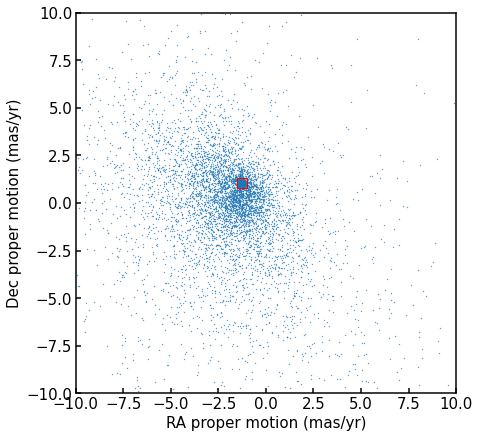

In [7]:
fig, ax = plt.subplots(1, figsize=(7,7))

x, y = 'pmra', 'pmdec'
xlim = [-1.5,-1]
ylim = [0.8,1.3]
ax.scatter(cluster[x],cluster[y],s=0.1)
rec = plt.Rectangle([xlim[0],ylim[0]],xlim[1]-xlim[0],ylim[1]-ylim[0],fill=False,color='red')
ax.add_patch(rec)
ax.set_xlabel('RA proper motion (mas/yr)')
ax.set_ylabel('Dec proper motion (mas/yr)')
ax.set_xlim([-10,10])
ax.set_ylim([-10,10])
ax.set_aspect('equal', 'box')

sample = cluster[(cluster[x]>xlim[0])&(cluster[x]<xlim[1])&(cluster[y]>ylim[0])&(cluster[y]<ylim[1])]
distant = sample
plt.show()

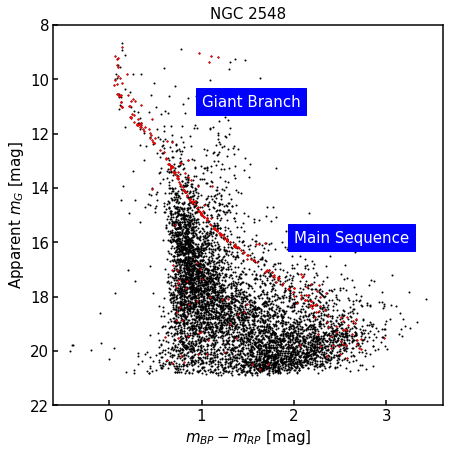

In [8]:
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(7,7))

ax.scatter(cluster['bp_rp'],cluster['phot_g_mean_mag'],s=1,alpha=1,c='black')
ax.scatter(sample['bp_rp'],sample['phot_g_mean_mag'],s=1,alpha=1,c='red')
ax.set_ylim([22,8])
ax.set_xlabel(r'$m_{BP} - m_{RP}\ [{\rm mag}]$')
ax.set_ylabel(r'Apparent $m_{G}\ [{\rm mag}]$')
ax.set_title('NGC 2548')

plt.text(2,16,'Main Sequence',backgroundcolor='blue',c='white',fontsize=15)
plt.text(1,11,'Giant Branch',backgroundcolor='blue',c='white',fontsize=15)

plt.show()

#### 4. Compare the close cluster and the distant cluster

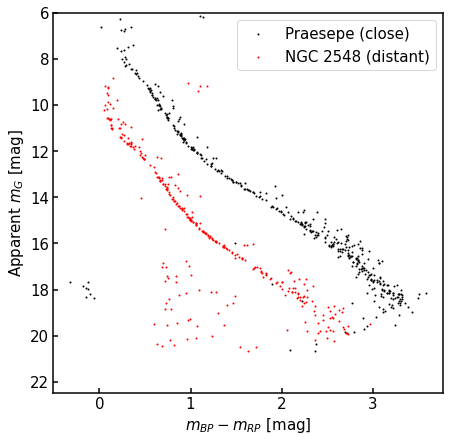

In [9]:
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(7,7))
ax.scatter(close['bp_rp'],close['phot_g_mean_mag'],s=1,alpha=1,c='black',label='Praesepe (close)')
ax.scatter(distant['bp_rp'],distant['phot_g_mean_mag'],s=1,alpha=1,c='red',label='NGC 2548 (distant)')
ax.set_ylim([22.5,6])
ax.set_xlabel(r'$m_{BP} - m_{RP}\ [{\rm mag}]$')
ax.set_ylabel(r'Apparent $m_{G}\ [{\rm mag}]$')
ax.legend()

I determined the offset by the main sequence. I interpolate `bp-rp` of the distant cluster with `bp-rp` and G-band magnitude of the close cluster. The median of (real-interpolated) G-band magnitude is taken as the difference of distance modulus of the two clusters.

The disadvantage of this method is some of the giant branch stars will be taken into account as an extreme value. Taking median instead of mean may solve this problem.

Difference in distance modulus is 3.25
Distance modulus of the distant cluster is 9.59, parallax should be 1.21
Comparing with GAIA DR2 paper, the relative error of the parallax is -0.06


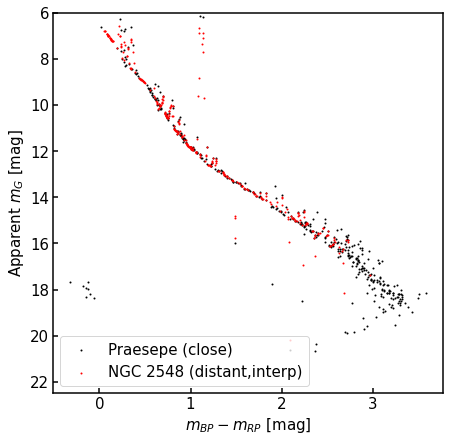

In [10]:
sort = np.argsort(close['bp_rp'])
inter_mg = np.interp(distant['bp_rp'],close['bp_rp'][sort],close['phot_g_mean_mag'][sort])

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(7,7))
ax.scatter(close['bp_rp'],close['phot_g_mean_mag'],s=1,alpha=1,c='black',label='Praesepe (close)')
ax.scatter(distant['bp_rp'],inter_mg,s=1,alpha=1,c='red',label='NGC 2548 (distant,interp)')
ax.set_ylim([22.5,6])
ax.legend()
ax.set_xlabel(r'$m_{BP} - m_{RP}\ [{\rm mag}]$')
ax.set_ylabel(r'Apparent $m_{G}\ [{\rm mag}]$')

d_dist = np.median(distant['phot_g_mean_mag']-inter_mg)
#mu     = 10-5*np.log10(5.371)+d_dist
mu     = 5*np.log10(distance(close)/10)+d_dist
mu2para = lambda mu:(10**((10-mu)/5))
print(f'Difference in distance modulus is {d_dist:.2f}')
print(f'Distance modulus of the distant cluster is {mu:.2f}, parallax should be {mu2para(mu):.2f}')
error = (mu2para(mu)-mu2para(9.451))/mu2para(9.451)
print(f'Comparing with GAIA DR2 paper, the relative error of the parallax is {error:.2f}')

#### 5. Take a cluster with more dust : [NGC6793](http://simbad.u-strasbg.fr/simbad/sim-id?Ident=NGC+6793&NbIdent=1&Radius=2&Radius.unit=arcmin&submit=submit+id)

In [11]:
cluster = Table.read('./NGC6793-result.fits')
cluster = cluster[~np.isnan(cluster['pmra'])&(~np.isnan(cluster['pmdec']))&(cluster['parallax']>0)]

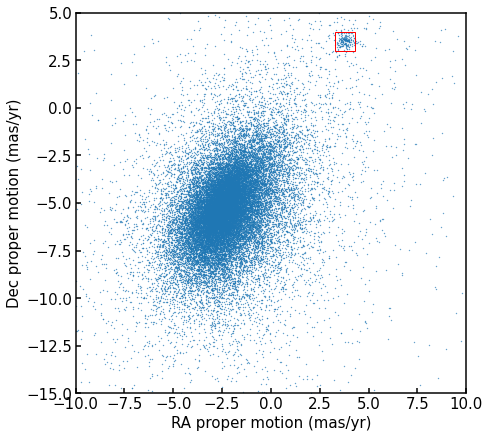

In [12]:
fig, ax = plt.subplots(1, figsize=(7,7))

x, y = 'pmra', 'pmdec'
xlim = [3.3,4.3]
ylim = [3,4]
ax.scatter(cluster[x],cluster[y],s=0.1)
rec = plt.Rectangle([xlim[0],ylim[0]],xlim[1]-xlim[0],ylim[1]-ylim[0],fill=False,color='red')
ax.add_patch(rec)
ax.set_xlabel('RA proper motion (mas/yr)')
ax.set_ylabel('Dec proper motion (mas/yr)')
ax.set_xlim([-10,10])
ax.set_ylim([-15,5])
#ax.set_aspect('equal', 'box')

sample = cluster[(cluster[x]>xlim[0])&(cluster[x]<xlim[1])&(cluster[y]>ylim[0])&(cluster[y]<ylim[1])]
dusty = sample
plt.show()

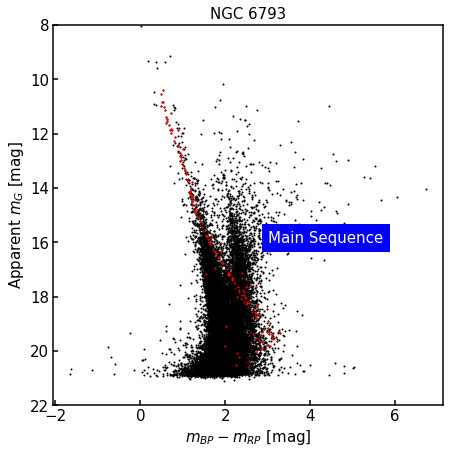

In [13]:
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(7,7))

ax.scatter(cluster['bp_rp'],cluster['phot_g_mean_mag'],s=1,alpha=1,c='black')
ax.scatter(sample['bp_rp'],sample['phot_g_mean_mag'],s=1,alpha=1,c='red')
ax.set_ylim([22,8])
ax.set_xlabel(r'$m_{BP} - m_{RP}\ [{\rm mag}]$')
ax.set_ylabel(r'Apparent $m_{G}\ [{\rm mag}]$')
ax.set_title('NGC 6793')

plt.text(3,16,'Main Sequence',backgroundcolor='blue',c='white',fontsize=15)
#plt.text(1,11,'Giant Branch',backgroundcolor='blue',c='white',fontsize=15)

plt.show()

#### 5. Compare the dusty cluster and clost cluster to get distance
Comparing with GAIA paper, I get a larger error of ~24%, while is less reliable than NGC 6793.

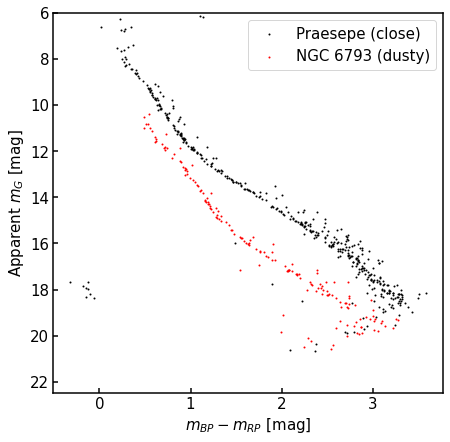

In [14]:
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(7,7))
ax.scatter(close['bp_rp'],close['phot_g_mean_mag'],s=1,alpha=1,c='black',label='Praesepe (close)')
ax.scatter(dusty['bp_rp'],dusty['phot_g_mean_mag'],s=1,alpha=1,c='red',label='NGC 6793 (dusty)')
ax.set_ylim([22.5,6])
ax.set_xlabel(r'$m_{BP} - m_{RP}\ [{\rm mag}]$')
ax.set_ylabel(r'Apparent $m_{G}\ [{\rm mag}]$')
ax.legend()
plt.show()

Difference in distance modulus is 2.09
Distance modulus of the distant cluster is 8.43, parallax should be 2.06
Comparing with GAIA DR2 paper, the relative error of the parallax is 0.24


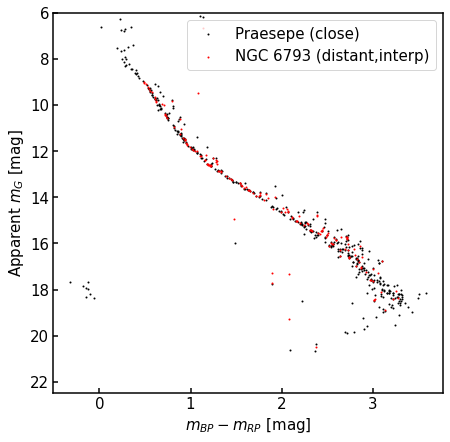

In [15]:
sort = np.argsort(close['bp_rp'])
inter_mg = np.interp(dusty['bp_rp'],close['bp_rp'][sort],close['phot_g_mean_mag'][sort])

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(7,7))
ax.scatter(close['bp_rp'],close['phot_g_mean_mag'],s=1,alpha=1,c='black',label='Praesepe (close)')
ax.scatter(dusty['bp_rp'],inter_mg,s=1,alpha=1,c='red',label='NGC 6793 (distant,interp)')
ax.set_ylim([22.5,6])
ax.legend()
ax.set_xlabel(r'$m_{BP} - m_{RP}\ [{\rm mag}]$')
ax.set_ylabel(r'Apparent $m_{G}\ [{\rm mag}]$')

dist = dusty['phot_g_mean_mag']-inter_mg
d_dist = np.median(np.median(dist[~np.isnan(dist)]))
#mu     = 10-5*np.log10(5.371)+d_dist
mu     = 5*np.log10(distance(close)/10)+d_dist
print(f'Difference in distance modulus is {d_dist:.2f}')
print(f'Distance modulus of the distant cluster is {mu:.2f}, parallax should be {mu2para(mu):.2f}')
error = (mu2para(mu)-mu2para(8.894))/mu2para(8.894)
print(f'Comparing with GAIA DR2 paper, the relative error of the parallax is {error:.2f}')

#### 6. Plot the color-color diagram. What's interesting?
All of the clusters seems to follow the same scaling relation, while the red end of the dusty cluster (NGC6793) disapper comparing with the clean cluster (NGC2548). That's because dust extinction gradually starts toward 200nm -- BP will be fainter than G-band and G-band should be fainter than RP, which means the color BP-G and G-RP will always larger than a certain value. 

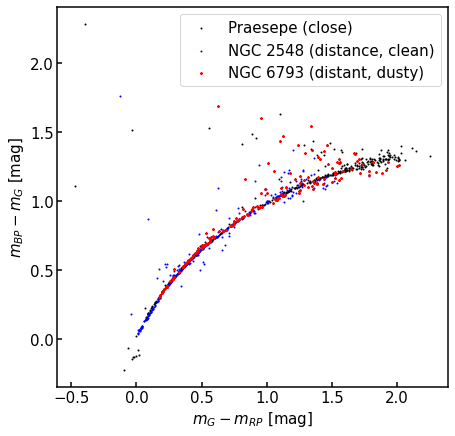

In [16]:
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(7,7))
ax.scatter(close['bp_g'],close['g_rp'],s=1,alpha=1,c='black',label='Praesepe (close)')
ax.scatter(distant['bp_g'],distant['g_rp'],s=1,alpha=1,c='blue',label='NGC 2548 (distance, clean)')
ax.scatter(dusty['bp_g'],dusty['g_rp'],s=5,alpha=1,marker='*',c='red',label='NGC 6793 (distant, dusty)')

ax.legend()
ax.set_ylabel(r'$m_{BP} - m_{G}\ [{\rm mag}]$')
ax.set_xlabel(r'$m_{G} - m_{RP}\ [{\rm mag}]$')
plt.show()